## Importing Libraries

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# lets check the head of naukri
data = pd.read_csv('NaukriData.csv')

# lets check the shape
data.shape

(22000, 14)

In [3]:
# lets check the Head of the Dataset
data.head()

company  \
0                            MM Media Pvt Ltd   
1                          find live infotech   
2         Softtech Career Infosystem Pvt. Ltd   
3                      Onboard HRServices LLP   
4  Spire Technologies and Solutions Pvt. Ltd.   

                                           education   experience  \
0  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    0 - 1 yrs   
1  UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...    0 - 0 yrs   
2  UG: Any Graduate - Any Specialization PG:Any P...    4 - 8 yrs   
3  UG: Any Graduate - Any Specialization PG:CA Do...  11 - 15 yrs   
4  UG: B.Tech/B.E. - Any Specialization PG:Any Po...    6 - 8 yrs   

                                   industry  \
0          Media / Entertainment / Internet   
1  Advertising / PR / MR / Event Management   
2           IT-Software / Software Services   
3    Banking / Financial Services / Broking   
4           IT-Software / Software Services   

                                      jobdescription         jobid  \
0  Job Description   Send me Jobs like this Quali...  210516002263   
1  Job Description   Send me Jobs like this Quali...  210516002391   
2  Job Description   Send me Jobs like this - as ...  101016900534   
3  Job Description   Send me Jobs like this - Inv...   81016900536   
4  Job Description   Send me Jobs like this Pleas...  120916002122   

                                 joblocation_address  \
0                                            Chennai   
1                                            Chennai   
2                                          Bengaluru   
3  Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...   
4                                          Bengaluru   

                                   jobtitle  numberofpositions  \
0  Walkin Data Entry Operator (night Shift)                NaN   
1        Work Based Onhome Based Part Time.               60.0   
2                    Pl/sql Developer - SQL                NaN   
3    Manager/ad/partner - Indirect Tax - CA                NaN   
4           JAVA Technical Lead (6-8 yrs) -                4.0   

                          payrate                   postdate site_name  \
0         1,50,000 - 2,25,000 P.A  2016-05-21 19:30:00 +0000       NaN   
1  1,50,000 - 2,50,000 P.A. 20000  2016-05-21 19:30:00 +0000       NaN   
2      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
3      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   
4      Not Disclosed by Recruiter  2016-10-13 16:20:55 +0000       NaN   

                                  skills                           uniq_id  
0                                   ITES  43b19632647068535437c774b6ca6cf8  
1                              Marketing  d4c72325e57f89f364812b5ed5a795f0  
2  IT Software - Application Programming  c47df6f4cfdf5b46f1fd713ba61b9eba  
3                               Accounts  115d28f140f694dd1cc61c53d03c66ae  
4  IT Software - Application Programming  a12553fc03bc7bcced8b1bb8963f97b4

In [8]:
# lets check the columns of the dataset
data.columns

Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

## Cleaning the Job Location Address

In [4]:

data['joblocation_adress'] = data['joblocation_address'].str.split(',')
pd.set_option('max_rows', 300000)
data['joblocation_adress'][:5]

0                                            [Chennai]
1                                            [Chennai]
2                                          [Bengaluru]
3    [Mumbai,  Bengaluru,  Kolkata,  Chennai,  Coim...
4                                          [Bengaluru]
Name: joblocation_adress, dtype: object

In [5]:
data = data.explode('joblocation_adress')
pd.set_option('max_rows', 30000)
data['joblocation_adress'].value_counts()[:20]

Bengaluru/Bangalore           3775
Mumbai                        2593
Bengaluru/Bangalore           2134
Bengaluru                     2026
 Mumbai                       1378
Chennai                       1290
Hyderabad / Secunderabad      1246
Hyderabad                     1154
Mumbai                        1067
 Mumbai                        923
 Chennai                       905
Delhi                          790
Noida                          777
Gurgaon                        762
 Chennai                       738
 Hyderabad / Secunderabad      700
Delhi                          680
 Pune                          645
 Delhi                         602
 Gurgaon                       557
Name: joblocation_adress, dtype: int64

In [6]:

data['joblocation_adress'] = data['joblocation_adress'].replace(('(Bengaluru/Bangalore)',' Bangalore',
                                                                ' Bangalore ','Bangalore ','Bengaluru/Bangalore ',
                                                                 ' Bengaluru/Bangalore ',' Bengaluru/Bangalore',
                                                                'Bengaluru/Bangalore','Bengaluru','NCR Bangalore',
                                                                'NCR Bangalore ','Near Bangalore', ' Bengaluru/Bangalore',
                                                                 ' Bengaluru/Bangalore ', ' Bengaluru',
                                                                 'Bangalore , Bangalore / Bangalore',
                                                                 'Bangalore , karnataka',' Bengaluru / Bangalore', 
                                                                 ' Bengaluru / Bangalore ', 'Bengaluru Bangalore',
                                                                 'India-Karnataka-Bangalore',' bangalore',' karnataka',
                                                                ' Bengaluru Bangalore'),
                                                                ('Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore','Bangalore',
                                                                 'Bangalore','Bangalore', 'Bangalore','Bangalore','Bangalore',
                                                                'Bangalore','Bangalore','Bangalore','Bangalore',))
                                                                
data['joblocation_adress'] = data['joblocation_adress'].replace(('Hyderabad / Secunderabad',' Hyderabad / Secunderabad',
                                                                 ' Hyderabad / Secunderabad ','Hyderabad / Secunderabad ',
                                                                ' Hyderabad','Hyderabad ',' Hyderabad ',
                                                                 'Hyderabad/Secunderabad','Hyderabad/Secunderabad ',
                                                                ' Hyderabad/Secunderabad ',' Hyderabad/Secunderabad',),
                                                                ('Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                 'Hyderabad', 'Hyderabad','Hyderabad','Hyderabad',
                                                                'Hyderabad','Hyderabad','Hyderabad'))


  
data['joblocation_adress'] = data['joblocation_adress'].replace(('NAVI MUMBAI',' NAVI MUMBAI','NAVI MUMBAI ',
                                                                 ' NAVI MUMBAI',' NAVI MUMBAI ','Mumbai , Mumbai',
                                                                 ' Mumbai',' Mumbai ','Mumbai ','mumbai','Navi Mumbai',
                                                                ' Navi Mumbai',' Navi Mumbai ','Navi Mumbai ', 
                                                                 ' Mumbai Suburbs','Mumbai Suburbs ','Mumbai Suburbs',
                                                                ' Mumbai Suburbs ','mumbai',' mumbai','mumbai ',
                                                                 ' maharashtra'),
                                                                ('Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                 'Mumbai','Mumbai','Mumbai', 'Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai','Mumbai',
                                                                'Mumbai','Mumbai', 'Mumbai'))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Noida','Noida ',' Noida',' Delhi','Delhi','Delhi ',' Delhi ',
                                                                 'Gurgaon',' Gurgaon',' Gurgaon ','Gurgaon ', ' noida',
                                                                 ' Noida/Greater Noida',' Noida ', ' Delhi NCR',
                                                                 'Delhi/NCR(National Capital Region)',' Delhi/NCR ',
                                                                 ' Delhi/NCR(National Capital Region)',
                                                                 ' Delhi/NCR(National Capital Region) ',
                                                                 'Delhi/NCR(National Capital Region) ','Delhi , Delhi',
                                                                 'Noida , Noida/Greater Noida','Ghaziabad',
                                                                 'Delhi/NCR(National Capital Region) , Gurgaon',
                                                                 'NCR , NCR','NCR/NCR(National Capital Region)',
                                                                'NCR , NCR/Greater NCR','NCR/NCR(National Capital Region), NCR',
                                                                 'NCR , NCR/NCR(National Capital Region)',
                                                                 'NCR/NCR(National Capital Region)','NCR/Greater NCR',
                                                                 'NCR/NCR(National Capital Region) , NCR','Delhi/NCR ',
                                                                ' Noida/Greater Noida','Greater Noida',' Greater Noida',
                                                                 ' Greater Noida ','Greater Noida ','Ghaziabad',' Ghaziabad',
                                                                 'Ghaziabad ',' Ghaziabad ','Faridabad','Faridabad ',
                                                                 ' Faridabad',' Faridabad ',' Noida/Greater Noida',
                                                                 ' Noida/Greater Noida ',' delhi',' Delhi/NCR','Delhi NCR'
                                                                ),
                                                                ('NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR','NCR','NCR','NCR','NCR','NCR', 'NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                 'NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR','NCR',
                                                                'NCR'))


data['joblocation_adress'] = data['joblocation_adress'].replace(('Chennai ',' Chennai',' Chennai ',' Chennai',
                                                                 'chennai ',' chennai',' chennai ',' chennai',),
                                                                ('Chennai', 'Chennai','Chennai','Chennai','Chennai',
                                                                'Chennai','Chennai','Chennai',))

data['joblocation_adress'] = data['joblocation_adress'].replace(('Pune ',' Pune',' Pune '),('Pune','Pune','Pune'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Kolkata ',' Kolkata',' Kolkata ',
                                                                ' kolkata','kolkata ',' kolkata'),
                                                                ('Kolkata','Kolkata','Kolkata',
                                                                  'Kolkata','Kolkata','Kolkata'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Ahmedabad','Ahmedabad ',' Ahmedabad '),('Ahmedabad',
                                                                                         'Ahmedabad','Ahmedabad'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Chandigarh ',' Chandigarh',' Chandigarh '),
                                                                ('Chandigarh','Chandigarh','Chandigarh'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Surat ',' Surat',' Surat '),
                                                                ('Surat','Surat','Surat'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Ernakulam / Kochi/ Cochin ', ' Kochi', 'Kochi ',' Kochi ',
                                                                 ' Cochin/ Kochi/ Ernakulam', ' Cochin/ Kochi/ Ernakulam ', 
                                                                 ' Ernakulam / Kochi/ Cochin',' Ernakulam / Kochi/ Cochin '),
                                                                ('Kochi','Kochi','Kochi','Kochi','Kochi','Kochi','Kochi',
                                                                 'Kochi',))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Coimbatore ',' Coimbatore',' Coimbatore '),
                                                                ('Coimbatore','Coimbatore','Coimbatore'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Lucknow ',' Lucknow',' Lucknow '),
                                                                ('Lucknow','Lucknow','Lucknow'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Jaipur ',' Jaipur',' Jaipur ','jaipur ',' jaipur',
                                                                 ' jaipur '),
                                                                ('Jaipur','Jaipur','Jaipur','Jaipur','Jaipur','Jaipur'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Vijayawada ',' Vijayawada',' Vijayawada '),
                                                                ('Vijayawada','Vijayawada','Vijayawada'))
data['joblocation_adress'] = data['joblocation_adress'].replace(('Visakhapatnam ',' Visakhapatnam',' Visakhapatnam ',
                                                                'Visakhapatnam/Vizag ',' Visakhapatnam/Vizag',
                                                                 ' Visakhapatnam/Vizag '),
                                                                ('Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                 'Visakhapatnam','Visakhapatnam','Visakhapatnam',
                                                                ))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhubaneshwar',' Bhubaneshwar',' Bhubaneshwar '),
                                                                ('Bhubaneshwar','Bhubaneshwar','Bhubaneshwar'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Patna',' Patna',' Patna '),
                                                                ('Patna','Patna','Patna'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Trivandrum',' Trivandrum',' Trivandrum '),
                                                                ('Trivandrum','Trivandrum','Trivandrum'))

data['joblocation_adress'] = data['joblocation_adress'].replace((' Mangalore',' Mangalore',' Mangalore '),
                                                                ('Mangalore','Mangalore','Mangalore'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Indore',' Indore',' Indore '),
                                                                ('Indore','Indore','Indore'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Guwahati',' Guwahati',' Guwahati '),
                                                                ('Guwahati','Guwahati','Guwahati'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Nagpur',' Nagpur',' Nagpur '),
                                                                ('Nagpur','Nagpur','Nagpur'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Raipur',' Raipur',' Raipur '),
                                                                ('Raipur','Raipur','Raipur'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Thane',' Thane',' Thane '),
                                                                ('Thane','Thane','Thane'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Bhopal',' Bhopal',' Bhopal '),
                                                                ('Bhopal','Bhopal','Bhopal'))
data['joblocation_adress'] = data['joblocation_adress'].replace((' Vadodara/Baroda',' Vadodara/Baroda',' Vadodara/Baroda ',
                                                                ' Vadodara','Vadodara ',' Vadodara '),
                                                                ('Vadodara','Vadodara','Vadodara','Vadodara',
                                                                 'Vadodara','Vadodara',))
                                                                                                                                  
pd.set_option('max_rows', 2400)
data['joblocation_adress'].value_counts()

Bangalore                                         9963
NCR                                               8668
Mumbai                                            6403
Hyderabad                                         4570
Chennai                                           3373
Pune                                              1227
Kolkata                                            543
Ahmedabad                                          404
Chandigarh                                         189
Kochi                                              140
Coimbatore                                         136
Jaipur                                             131
Visakhapatnam                                      125
Surat                                              106
Lucknow                                            101
Vijayawada                                          84
Bhubaneshwar                                        74
Trivandrum                                          69
Vadodara  

Bangalore        9963
NCR              8668
Mumbai           6403
Hyderabad        4570
Chennai          3373
Pune             1227
Kolkata           543
Ahmedabad         404
Chandigarh        189
Kochi             140
Coimbatore        136
Jaipur            131
Visakhapatnam     125
Surat             106
Lucknow           101
Vijayawada         84
Bhubaneshwar       74
Trivandrum         69
Vadodara           65
Indore             63
Mangalore          57
Thane              48
Nagpur             45
Bhopal             42
Guwahati           39
Raipur             32
Patna              26
Name: joblocation_adress, dtype: int64

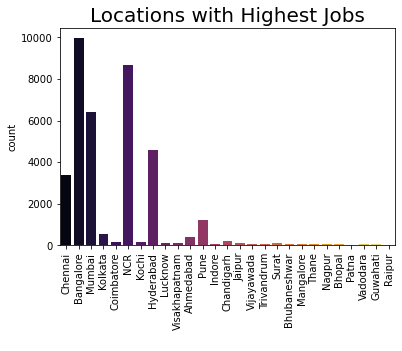

In [7]:
counts = data['joblocation_adress'].value_counts()
data = data.loc[data['joblocation_adress'].isin(counts.index[counts > 25])]
display(data['joblocation_adress'].value_counts())

sns.countplot(data['joblocation_adress'], palette = 'inferno')
plt.title('Locations with Highest Jobs', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

## Cleaning the Experience Column

In [8]:
data['experience'][:5]

0      0 - 1 yrs
1      0 - 0 yrs
2      4 - 8 yrs
3    11 - 15 yrs
3    11 - 15 yrs
Name: experience, dtype: object

In [9]:
pd.set_option('max_rows', 40000)
data['experience'].str.split(' ')[:5]

0      [0, -, 1, yrs]
1      [0, -, 0, yrs]
2      [4, -, 8, yrs]
3    [11, -, 15, yrs]
3    [11, -, 15, yrs]
Name: experience, dtype: object

In [10]:
data['experience'] = data['experience'].str.split(" ")
data['Min Experience'] = data['experience'].apply(lambda x: x[0])
data['Max Experience'] = data['experience'].apply(lambda x: x[2] if len(x) > 2 else x[1])

In [16]:
data['Min Experience'].value_counts()

2      7301
0      6340
3      5343
1      4490
5      3329
4      3135
6      1530
10     1430
8      1292
7      1048
9       486
12      315
15      285
Not     111
11       75
13       74
14       63
20       26
18       25
16       16
17        6
23        1
25        1
26        1
Name: Min Experience, dtype: int64

In [17]:
data['Max Experience'].value_counts()

5            6458
7            4494
8            3740
6            3303
3            3233
10           2860
4            2664
9            1815
2            1597
12           1085
1            1064
11           1059
15            834
13            682
20            501
0             358
14            251
18            134
Mentioned     111
16            109
17             94
25             85
22             85
19             27
23             26
24             20
21             12
30             11
28              8
-1              1
27              1
26              1
Name: Max Experience, dtype: int64

In [11]:
data['Min Experience'] = data['Min Experience'].replace('Not',0)
data['Max Experience'] = data['Max Experience'].replace(('Mentioned','-1'), (5,5))

# lets convert thenm into numerical data types
data['Min Experience'] = data['Min Experience'].astype('int')
data['Max Experience'] = data['Max Experience'].astype('int')

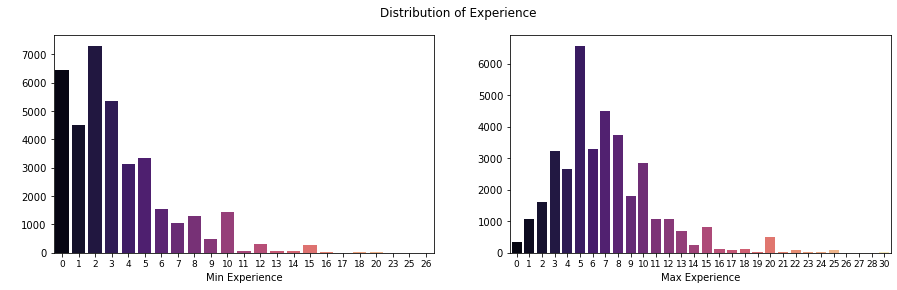

In [12]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.countplot(data['Min Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.subplot(1, 2, 2)
sns.countplot(data['Max Experience'], palette = 'magma')
plt.xticks(fontsize = 9)
plt.ylabel(" ")

plt.suptitle('Distribution of Experience')
plt.show()

## Cleaning the Education Column

In [20]:
data['education'][:5]

0    UG: B.Tech/B.E. - Any Specialization PG:Any Po...
1    UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...
2    UG: Any Graduate - Any Specialization PG:Any P...
3    UG: Any Graduate - Any Specialization PG:CA Do...
3    UG: Any Graduate - Any Specialization PG:CA Do...
Name: education, dtype: object

In [13]:
data['education'] = data['education'].fillna('UG: Any Graduate - Any Specialization')
data['education'].isnull().sum()

0

In [14]:
data['Education'] = data['education'].str.split(' ')
data['Education'] = data['Education'].apply(lambda x: x[1] if len(x) > 1 else x[0])

data['Education'].value_counts(dropna = False)

Any                    24216
B.Tech/B.E.             8835
B.Com                    647
B.Sc                     544
Diploma                  441
Graduation               397
B.B.A                    267
B.A                      240
BCA                      174
MBBS                     155
BDS                      109
B.Pharma                  97
Other                     86
B.Ed                      85
LLB                       71
Not                       54
-                         54
BHM                       54
Doctorate                 49
B.Arch                    37
B.Tech/B.E.,              23
B.Sc,                     21
Postgraduate              14
PG:CA                     10
Doctorate:Doctorate        9
B.Pharma,                  7
Diploma,                   5
B.Com,                     5
BVSC                       3
B.A,                       3
BCA,                       3
MBA/PGDM                   2
B.B.A,                     2
PG:Other                   1
BAMS          

In [23]:
# let's do some cleaning

data['Education'] = data['Education'].replace(('B.Tech/B.E.','Graduation','Other','-','Not','B.Tech/B.E.,','Postgraduate',
                                               'PG:CA','Diploma,','B.Com,','B.Pharma,','B.A,','BCA,','B.Sc,','MBA/PGDM','B.B.A,',
                                              'PG:Other','Doctorate:Doctorate','Post'),
                                              ('B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech','B.Tech',
                                              'CA','Diploma','B.Com','B.Pharma','B.A','BCA','B.Sc','MBA','BBA',
                                              'B.Tech','Doctorate','B.Tech'))

data['Education'].value_counts()

Any          24216
B.Tech        9464
B.Com          652
B.Sc           565
Diploma        446
B.B.A          267
B.A            243
BCA            177
MBBS           155
BDS            109
B.Pharma       104
B.Ed            85
LLB             71
Doctorate       58
BHM             54
B.Arch          37
CA              10
BVSC             3
BBA              2
MBA              2
BAMS             1
B.Des.           1
BFA              1
Name: Education, dtype: int64

Any            24216
B.Tech/B.E.     8835
B.Com            647
B.Sc             544
Diploma          441
Graduation       397
B.B.A            267
B.A              240
BCA              174
MBBS             155
BDS              109
B.Pharma          97
Other             86
B.Ed              85
LLB               71
Not               54
BHM               54
-                 54
Doctorate         49
B.Arch            37
Name: Education, dtype: int64

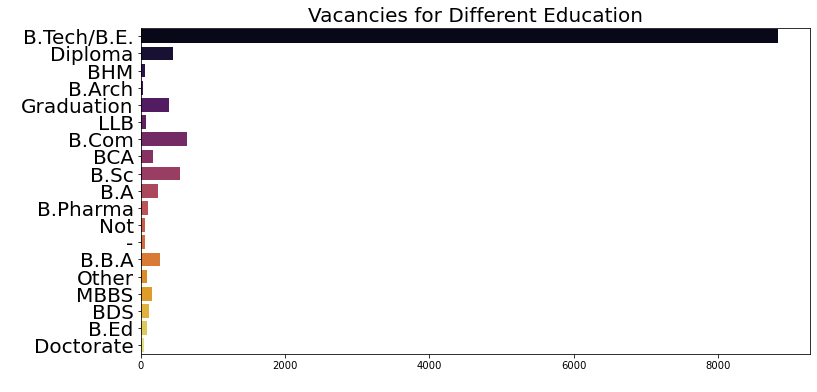

In [15]:
counts = data['Education'].value_counts()
data = data.loc[data['Education'].isin(counts.index[counts >= 25])]
display(data['Education'].value_counts())

plt.rcParams['figure.figsize'] = (12,6)
x = data[data['Education'] != 'Any']
sns.countplot(y = x['Education'], palette = 'inferno')
plt.title('Vacancies for Different Education', fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

## Cleaning the Industry Column

In [25]:
data['industry'][:10]

0            Media / Entertainment / Internet
1    Advertising / PR / MR / Event Management
2             IT-Software / Software Services
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
3      Banking / Financial Services / Broking
4             IT-Software / Software Services
5             IT-Software / Software Services
Name: industry, dtype: object

In [26]:
data['industry'].str.split(' / ')[:10]

0           [Media, Entertainment, Internet]
1    [Advertising, PR, MR, Event Management]
2           [IT-Software, Software Services]
3     [Banking, Financial Services, Broking]
3     [Banking, Financial Services, Broking]
3     [Banking, Financial Services, Broking]
3     [Banking, Financial Services, Broking]
3     [Banking, Financial Services, Broking]
4           [IT-Software, Software Services]
5           [IT-Software, Software Services]
Name: industry, dtype: object

In [16]:
data['industry'].isnull().sum()

1

In [17]:
data['industry'] = data['industry'].fillna(data['industry'].mode()[0])

data['industry'].isnull().sum()

0

IT-Software                 14660
BPO                          2320
Banking                      2108
Education                    1716
Recruitment                  1538
Automobile                   1169
Internet                     1019
Pharma                       1013
Construction                  951
Medical                       865
Travel                        728
Industrial Products           604
Other                         548
Accounting                    543
Strategy                      517
Advertising                   472
IT-Hardware & Networking      440
Media                         426
FMCG                          426
Insurance                     400
Retail                        368
Oil and Gas                   344
Telecom/ISP /                 316
Real Estate                   306
Consumer Electronics          268
Semiconductors                249
Electricals                   243
Textiles                      193
Courier                       183
KPO           

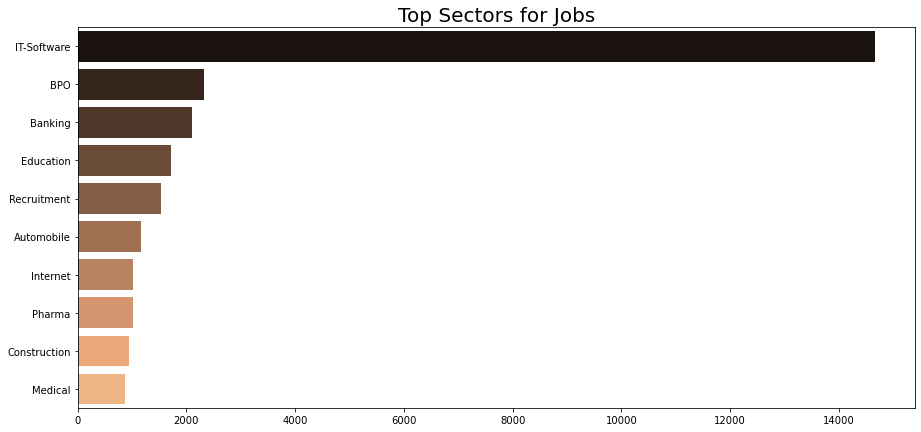

In [18]:
data['Industry'] = data['industry'].str.split(' / ')
data['Industry'] = data['Industry'].apply(lambda x: x[0])

display(data['Industry'].value_counts())

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Top Sectors for Jobs', fontsize = 20)
sns.barplot(y = data['Industry'].value_counts().head(10).index,
            x = data['Industry'].value_counts().head(10).values,
            palette = 'copper')
plt.show()

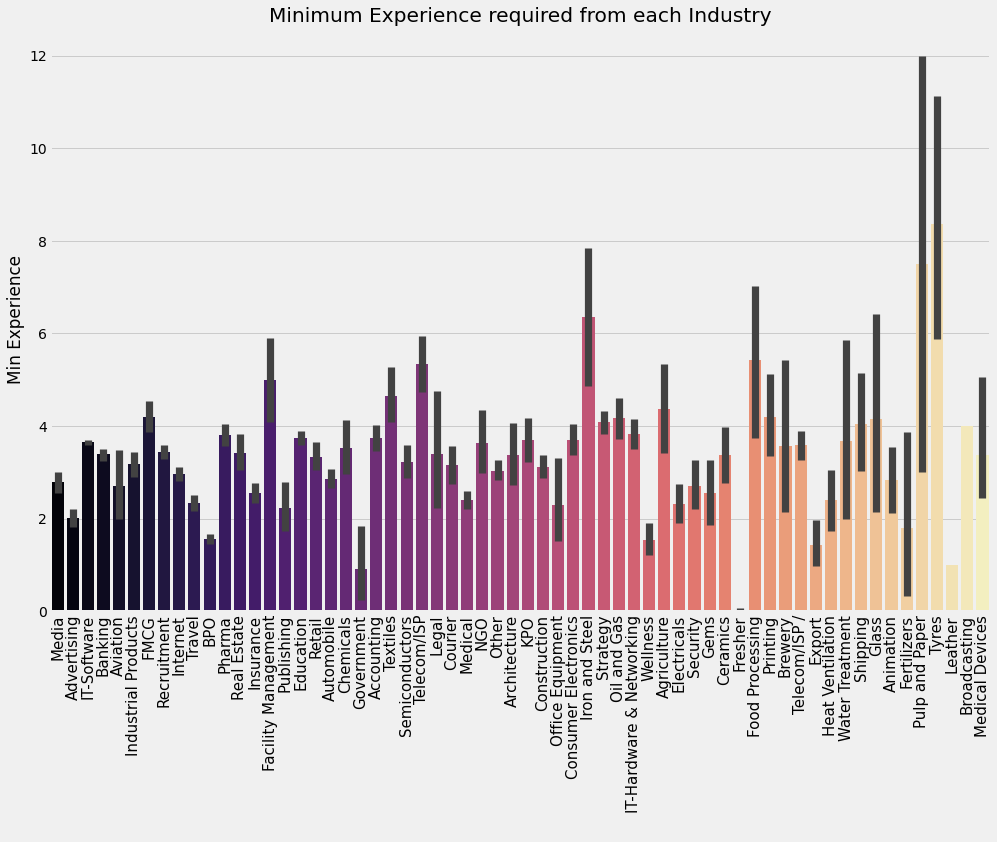

In [30]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Minimum Experience required from each Industry')
sns.barplot(data['Industry'], data['Min Experience'], palette = 'magma')
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel(' ')
plt.show()

## Cleaning the Skills Column

In [31]:
data['skills'].head(10)

0                                     ITES
1                                Marketing
2    IT Software - Application Programming
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
3                                 Accounts
4    IT Software - Application Programming
5    IT Software - Application Programming
Name: skills, dtype: object

In [32]:
data['skills'] = data['skills'].fillna(data['skills'].mode()[0])
data['skills'].isnull().sum()

0

Application Programming              9983
Sales                                5932
ITES                                 2952
Production                           1587
Accounts                             1529
HR                                   1455
Teaching                             1351
Marketing                            1327
Medical                               817
Financial Services                    749
Site Engineering                      672
Other                                 634
Engineering Design                    624
ERP                                   564
eCommerce                             529
Network Administration                507
QA & Testing                          479
IT Hardware                           466
Journalism                            427
DBA                                   424
Supply Chain                          379
Embedded                              368
Design                                342
Hotels                            

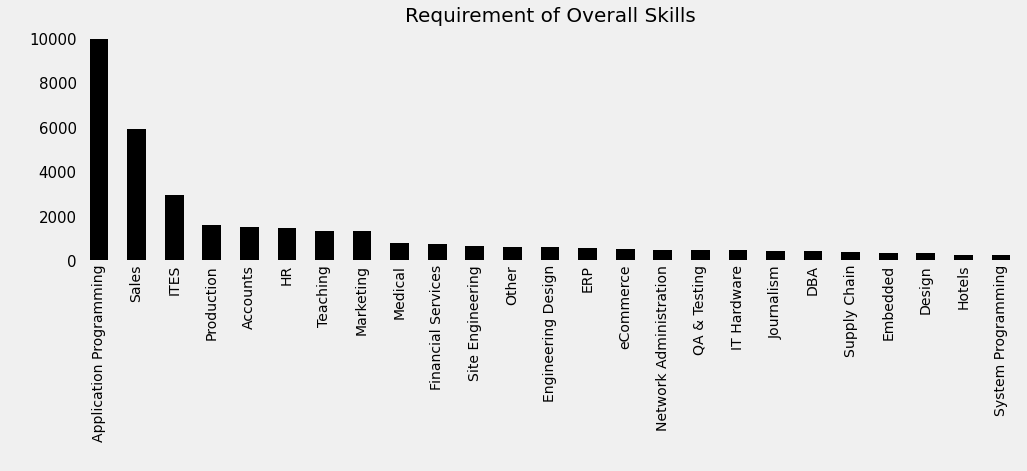

In [33]:
data['Skills'] = data['skills'].str.split(" - ")
data['Skills'] = data['Skills'].apply(lambda x: x[1] if len(x) > 1 else x[0])
display(data['Skills'].value_counts())

plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Requirement of Overall Skills', fontsize = 20)
data['Skills'].value_counts().head(25).plot(kind = 'bar', color = 'black')
plt.grid()
plt.yticks(fontsize = 15)
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

## Cleaning rest of the columns

In [37]:
data.isnull().sum()

company                   0
jobdescription            0
jobtitle                  0
numberofpositions     27818
payrate                  93
postdate                 29
joblocation_adress        0
Min Experience            0
Max Experience            0
Education                 0
Industry                  0
Skills                    0
dtype: int64

In [38]:
data['numberofpositions'] = data['numberofpositions'].fillna(1)
data['numberofpositions'] = data['numberofpositions'].astype('int')

# If the job post date and pay rate is missing it is useless, so lets remove the records where jobppostdate is not mentioned
data = data.dropna()
data.isnull().sum().sum()

0

In [39]:
data['postdate'].head()

0    2016-05-21 19:30:00 +0000
1    2016-05-21 19:30:00 +0000
2    2016-10-13 16:20:55 +0000
3    2016-10-13 16:20:55 +0000
3    2016-10-13 16:20:55 +0000
Name: postdate, dtype: object

In [40]:
data['postdate'] = data['postdate'].str.split(" ")
data['postdate'] = data['postdate'].apply(lambda x: x[0])
data['postdate'].head()

0    2016-05-21
1    2016-05-21
2    2016-10-13
3    2016-10-13
3    2016-10-13
Name: postdate, dtype: object